Name: **Arjun Salyan**

Roll no.: **17045026**

Branch: **Chemical Engineering**

Datest Used: [HAYES-ROTH](https://archive.ics.uci.edu/ml/datasets/Hayes-Roth)

In [16]:
# Overview of the dataset
# There are 5 numerical attributes
# Out task is to classify them into three classes
import pandas as pd 

df = pd.read_csv('hayes-roth.data',sep=',', header=None)
df.head()

,0,1,2,3,4,5
0,92,2,1,1,2,1.0
1,10,2,1,3,2,2.0
2,83,3,1,4,1,3.0
3,61,2,4,2,2,3.0
4,107,1,1,3,4,3.0


In [17]:
x = df.drop(5, axis=1)
x.head()

,0,1,2,3,4
0,92,2,1,1,2
1,10,2,1,3,2
2,83,3,1,4,1
3,61,2,4,2,2
4,107,1,1,3,4


In [18]:
# the class that we want to classify into
y = df[5]
y.head()

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
Name: 5, dtype: float64

In [19]:
# We can now split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the Training Data 
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Defining 10 sets of hyperparameters

In [29]:
# a list of 10 tuples
layers = [(11, 10, 9),(13, 10, 9),(15, 13, 8),(20, 13, 8),(15, 14, 7),(20, 17, 7),(22, 19, 10),(23, 20, 10),(25, 20, 12),(25,21, 12)]
learning_rates = [0.1, 0.15, 0.20, 0.25, 0.30, 0.3, 0.3, 0.3, 0.3, 0.3]

## Training the model on all hyperparameters 20 times

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
# training the model 10 times, using different set of layers and learning rates each time
# since we are not specifying number of iterations, so it will train until convergence
scores_data = []
for i in range(10):
    mlp = MLPClassifier(
        hidden_layer_sizes=layers[i], 
        learning_rate='constant', 
        learning_rate_init=learning_rates[i],
        random_state=1,
        max_iter=1000
    )
    scores = cross_val_score(mlp, X_train, y_train, cv=20)
    scores_data.append(scores)
    print("Layers: ", layers[i])
    print("Learning rate: ", learning_rates[i])
    print("CV Score: ", scores)
    print("\n")

Layers:  (11, 10, 9)
Learning rate:  0.1
CV Score:  [1.  0.8 0.6 0.4 0.6 0.6 0.6 1.  0.8 1.  0.8 0.8 0.6 0.6 0.8 1.  1.  1.
 0.6 1. ]


Layers:  (13, 10, 9)
Learning rate:  0.15
CV Score:  [1.  0.6 0.6 0.2 0.6 0.6 0.4 1.  0.6 0.6 0.8 0.8 1.  0.4 0.6 0.8 1.  0.4
 0.6 1. ]


Layers:  (15, 13, 8)
Learning rate:  0.2
CV Score:  [1.   0.8  0.6  0.4  0.4  0.6  0.8  0.6  0.6  0.6  0.8  0.8  0.8  0.6
 0.6  0.6  0.6  1.   0.8  0.25]


Layers:  (20, 13, 8)
Learning rate:  0.25
CV Score:  [0.6  0.6  0.2  0.6  0.4  0.6  0.6  0.8  0.6  0.6  0.6  0.6  0.4  0.4
 0.6  0.4  0.6  0.4  0.2  0.75]


Layers:  (15, 14, 7)
Learning rate:  0.3
CV Score:  [0.8 0.4 0.6 0.6 0.6 0.4 0.4 0.4 0.4 0.6 0.6 0.6 0.8 0.6 0.4 0.6 0.8 0.6
 0.4 0.5]


Layers:  (20, 17, 7)
Learning rate:  0.3
CV Score:  [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.8 0.4 0.6 0.4 0.4 0.4 0.2
 0.4 0.5]


Layers:  (22, 19, 10)
Learning rate:  0.3
CV Score:  [0.6  0.8  0.2  0.6  0.4  0.8  0.6  0.6  0.6  1.   0.6  0.8  0.8  0.6
 0.8  0.6  0.6  

## Box Plot

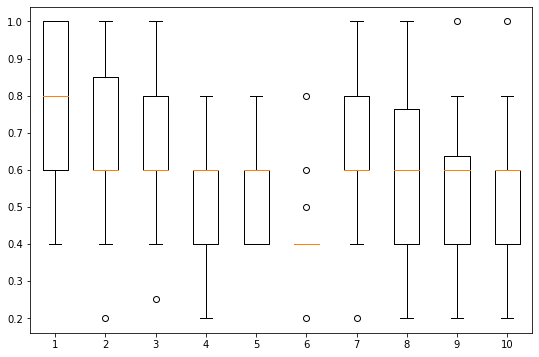

In [31]:
import matplotlib.pyplot as plt 

fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(scores_data)

From the boxplots, it seems that the first set of learning rates and layers give the most accurate results.

We can now train our model on these set of hyperparameters

## Our Final Model

In [32]:
mlp_model = MLPClassifier(
        hidden_layer_sizes=layers[0], 
        learning_rate='constant', 
        learning_rate_init=learning_rates[0],
        random_state=1,
        max_iter=1000
    )
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(11, 10, 9), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [33]:
predictions = mlp_model.predict(X_test)
y_test[132]= 1
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report,confusion_matrix
print("Cofusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Accuracy Score: ", accuracy_score(y_test, predictions))

Cofusion Matrix:
[[10  3  1]
 [ 3  9  0]
 [ 1  1  6]]

Accuracy Score:  0.7352941176470589


In [34]:
ad = []
y_test_list = y_test.to_list()
for j in range(20):
    predictions = mlp_model.predict(X_test)
    counter = 0
    for i in range(len(predictions)):
        if y_test_list[i]==predictions[i]:
            counter+=1
    accuracy = (counter*100/len(y_test_list))
    ad.append(accuracy)
mean_ad = sum(ad)/len(ad)

## Cumulative Match Characteristic Curve

Text(0, 0.5, 'Accuracy')

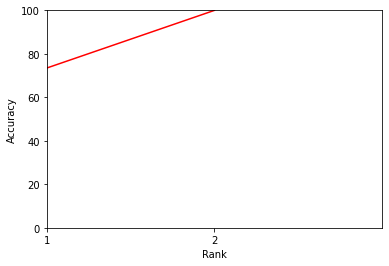

In [35]:
ad = [mean_ad,100]
ranks = ['1','2']
plt.plot(ranks,ad,'r-')
plt.ylim(0,100)
plt.xlim(0,2)
plt.xlabel('Rank')
plt.ylabel('Accuracy')